In [1]:
print("hello code")

hello code


In [1]:
!pip install tensorflow

In [2]:
!pip install matplotlib

In [3]:
import tensorflow as tf
import matplotlib.pyplot as plt

In [4]:
import os 
print("current Dir ",os.getcwd())
cur_dir=os.getcwd()
train_path=os.path.join(cur_dir,"datasets","Train")
test_path=os.path.join(cur_dir,"datasets","Test")
valid_path=os.path.join(cur_dir,"datasets","Valid")

current Dir  c:\Users\Shreeji\Desktop\Microsoft internship


In [5]:
training_set=tf.keras.utils.image_dataset_from_directory(
    train_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 900 files belonging to 3 classes.


In [6]:
training_set.class_names

['Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy']

In [7]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    valid_path,
    labels="inferred",
    label_mode="categorical",
    color_mode="rgb",
    image_size=(128,128),
    shuffle=True,
    interpolation="bilinear",
)

Found 300 files belonging to 3 classes.


In [8]:
cnn=tf.keras.models.Sequential()
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,padding='same',activation='relu',input_shape=[128,128,3]))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=256,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,padding='same',activation='relu'))
cnn.add(tf.keras.layers.Conv2D(filters=512,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=3,strides=2))

cnn.add(tf.keras.layers.Dropout(0.25))

cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=1500,activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.4))

cnn.add(tf.keras.layers.Dense(units=3,activation='softmax'))


In [9]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001),loss='categorical_crossentropy',metrics=['accuracy']
)

In [11]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 126, 126, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 62, 62, 32)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 62, 62, 64)        18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 29, 29, 64)       0         
 2D)                                                    

In [10]:
training_history=cnn.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
29/29 [==============================] - 162s 5s/step - loss: 1.1270 - accuracy: 0.4267 - val_loss: 0.8439 - val_accuracy: 0.6067
Epoch 2/10
29/29 [==============================] - 140s 5s/step - loss: 0.8042 - accuracy: 0.6122 - val_loss: 0.7803 - val_accuracy: 0.6467
Epoch 3/10
29/29 [==============================] - 141s 5s/step - loss: 0.7029 - accuracy: 0.6667 - val_loss: 0.5338 - val_accuracy: 0.7233
Epoch 4/10
29/29 [==============================] - 134s 5s/step - loss: 0.4903 - accuracy: 0.7778 - val_loss: 0.4516 - val_accuracy: 0.7500
Epoch 5/10
29/29 [==============================] - 135s 5s/step - loss: 0.3549 - accuracy: 0.8589 - val_loss: 0.3672 - val_accuracy: 0.8533
Epoch 6/10
29/29 [==============================] - 139s 5s/step - loss: 0.2058 - accuracy: 0.9200 - val_loss: 0.1782 - val_accuracy: 0.9300
Epoch 7/10
29/29 [==============================] - 136s 5s/step - loss: 0.1912 - accuracy: 0.9278 - val_loss: 0.1304 - val_accuracy: 0.9600
Epoch 8/10
29

In [12]:
train_loss,train_acc=cnn.evaluate(training_set)
print('Training accuracy : ', train_acc)

29/29 [==============================] - 41s 1s/step - loss: 0.0377 - accuracy: 0.9911
Training accuracy :  0.9911110997200012


In [13]:
val_loss,val_acc = cnn.evaluate(validation_set)
print('Validation Accuracy : ',val_acc)

10/10 [==============================] - 14s 1s/step - loss: 0.0916 - accuracy: 0.9667
Validation Accuracy :  0.9666666388511658


In [14]:
cnn.save('trained_plant_disease_model.keras')

In [15]:
training_history.history

{'loss': [1.1269603967666626,
  0.8042027354240417,
  0.702936053276062,
  0.49029743671417236,
  0.3548544943332672,
  0.2058473825454712,
  0.19119735062122345,
  0.21702922880649567,
  0.14469361305236816,
  0.08638279885053635],
 'accuracy': [0.4266666769981384,
  0.6122221946716309,
  0.6666666865348816,
  0.7777777910232544,
  0.8588888645172119,
  0.9200000166893005,
  0.9277777671813965,
  0.9133333563804626,
  0.9466666579246521,
  0.9711111187934875],
 'val_loss': [0.843909502029419,
  0.7802684307098389,
  0.5338016748428345,
  0.451585590839386,
  0.3672054409980774,
  0.17823104560375214,
  0.1303522288799286,
  0.16059112548828125,
  0.1305011510848999,
  0.09155669808387756],
 'val_accuracy': [0.6066666841506958,
  0.6466666460037231,
  0.7233333587646484,
  0.75,
  0.8533333539962769,
  0.9300000071525574,
  0.9599999785423279,
  0.95333331823349,
  0.9433333277702332,
  0.9666666388511658]}

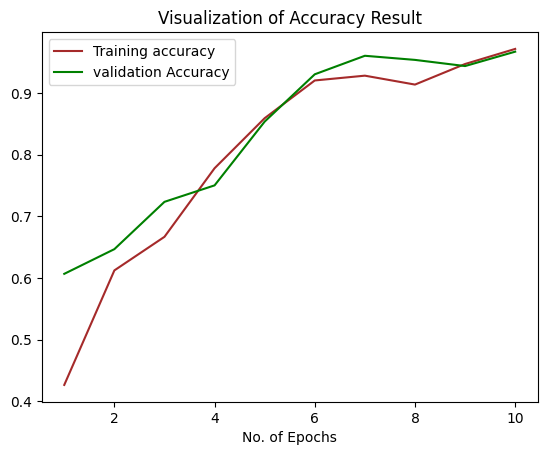

In [16]:
epochs=[i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='brown',label='Training accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='green',label='validation Accuracy')
plt.xlabel('No. of Epochs')
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()